In [42]:
# CartPole
# Policy gradient, linear policy, no Neural Network

# solved

import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')
# observation 4, action 0 or 1

# REINFORCE algorithm, update distribution parameters after one episode
theta = np.random.random([4,2])
gamma = 0.95
alpha = 0.01
steplog = []
for episode in range(1000):
    slog = []
    alog = []
    rlog = []
    plog = []
    s = env.reset()
    for step in range(200):
        # softmax
        prob = np.exp(np.dot(s, theta))/np.sum(np.exp(np.dot(s, theta)))
        # choose action by probability
        action = np.random.choice([0, 1], p=prob)
        s1, r, d, info = env.step(action)
        plog.append(prob)
        slog.append(s)
        alog.append(action)
        rlog.append(r)   
        
        s = s1
        #env.render()
        
        if d:
            break

    # calculate return v
    v = np.zeros([len(rlog)])
    v[-1] = rlog[-1]
    for i in range(len(rlog)):
        v[-i-1] = rlog[-i-1] + gamma * v[-i]
    # normalize return v
    v -= np.mean(v)
    v /= np.std(v)
        
    # reinforce update parameter theta
    for i in range(len(rlog)):
        a = alog[i]
        dtheta1 = alpha * slog[i] * (1 - plog[i][a]) * v[i]
        dtheta2 = alpha * slog[i] * (0 - plog[i][1-a]) * v[i]
        
        theta[:,a]   += dtheta1
        # why?
        theta[:,1-a] += dtheta2
        
    steplog.append(step)
print 'Training Done!'

[2017-07-11 14:36:42,959] Making new env: CartPole-v0


Training Done!


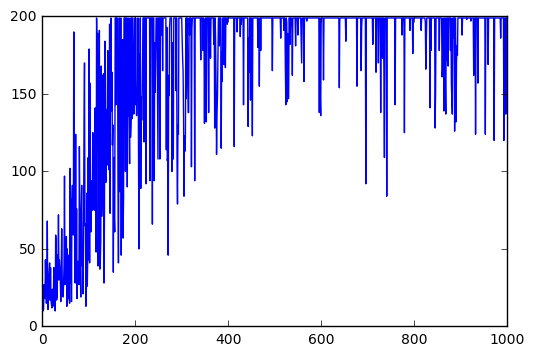

In [43]:
plt.plot(steplog)
plt.show()

In [18]:
theta

array([[ -5.47787614,  -5.63700555],
       [-17.01251078, -12.27519285],
       [ -5.75151005,   7.17943791],
       [ -1.20422751,   6.40755457]])

In [ ]:
import numpy as np
for i in range(1):
    env.render()
    action = env.action_space.sample()
    s, r, d, info = env.step(action)
    
theta = np.random.random([4,2])
np.dot(s, theta)